<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E3%80%8A%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E3%80%8B_%E5%8D%8E%E4%B8%AD%E5%86%9C%E4%B8%9A%E5%A4%A7%E5%AD%A6%20%E7%AC%AC%2016%20%E6%AC%A1%E5%BC%80%E8%AF%BE/4.2%20%20%E8%BF%90%E8%BE%93%E9%97%AE%E9%A2%98%20%E3%80%94%20pulp%20%E3%80%95%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

链接： [《数学建模》_华中农业大学 第 16 次开课](https://www.icourse163.org/learn/HZAU-1001658002?tid=1472021457#/learn/content)

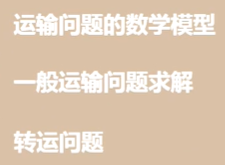

$m$ 个 **生产地点** $A_i,~~i=1,2,\cdots,m$
* 可供应某种物资， 其 **供应量 (产量)** 分别为 $a_i,~~i=1,2,\cdots,m$

$n$ 个 **销售地** $B_j,~~j=1,2,\cdots,n$
* 其 **需求量** 分别为 $b_j,~~j=1,2,\cdots,n$

从 $A_i$ 到 $B_j$ 运输单位物资的成本为 $c_{ij}$， 怎么运输最省？

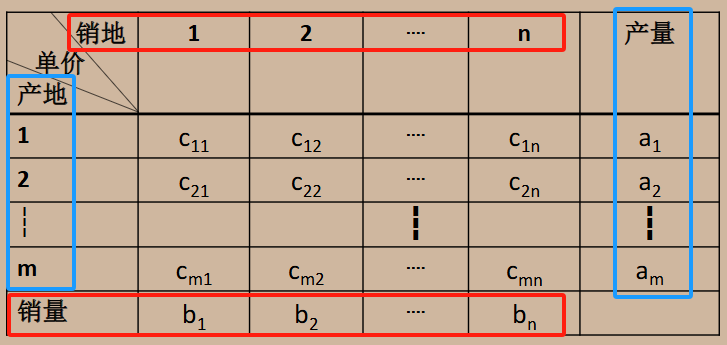

## 例 1 供销平衡

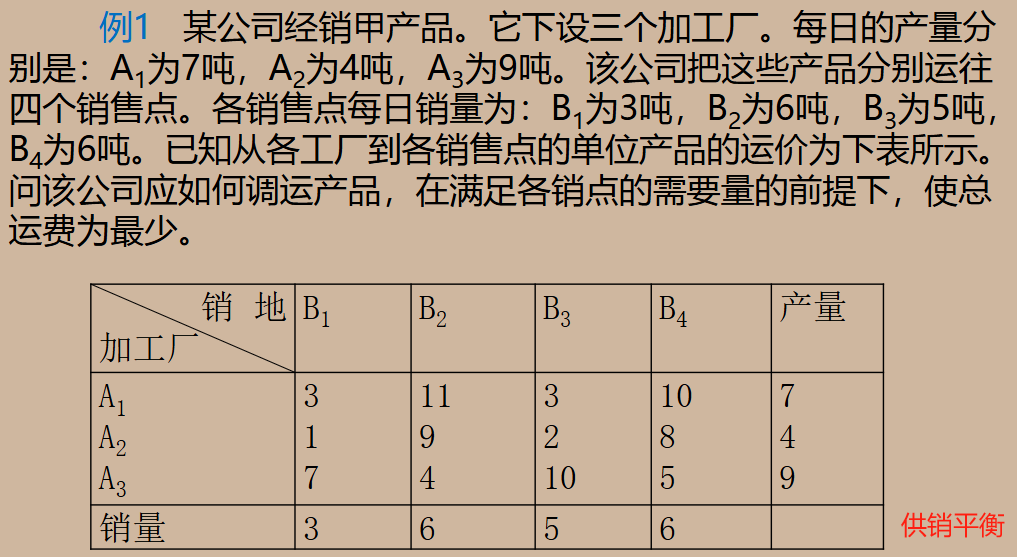

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 33.2 MB/s eta 0:00:00


In [ ]:
"""
用 PuLP 求解 产品配送问题
作者： 姓名，时间
"""
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp


from pulp import *

######### 1、给相关节点命名，以节点名称为键， 相关参数为值创建字典 #########
# Creates a list of all the supply nodes
Factorys = ["A1", "A2", "A3"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A1": 7,
      "A2": 4,
      "A3": 9}

# Creates a list of all demand nodes
Point_of_sales = ["B1", "B2", "B3", "B4"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "B1": 3,
    "B2": 6,
    "B3": 5,
    "B4": 6,
}

######### 2、将成本数据输入到一个列表中 #########
# Creates a list of costs of each transportation path
costs = [  # 销售地 Point_of_sales
   # B1 B2 B3 B4
    [3, 11, 3, 10],  # A1   加工厂 Factorys
    [1, 9, 2, 8],  # A2
    [7, 4, 10, 5],  # A3
]

# The cost data is made into a dictionary
costs = makeDict([Factorys, Point_of_sales], costs, 0)
# costs[“A1”][“B1”]： 从加工厂 A1 到 销售地 B1 的成本


######### 3、LpProblem 函数创建 prob 变量 并求解 #########
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("产品配送问题", LpMinimize)

# 创建包含 所有可能的传输路径 的元组列表
# Creates a list of tuples containing all the possible routes for transport
Routes = [(f, p) for f in Factorys for p in Point_of_sales]

# 创建 包含 LP 变量， 名为 vars 的字典
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Factorys, Point_of_sales), 0, None, LpInteger) # 产品数量为整数

# 添加目标函数
# The objective function is added to 'prob' first
prob += (
    lpSum([vars[f][p] * costs[f][p] for (f, p) in Routes]),
    "运输成本",
)

# 添加约束
# The supply maximum constraints are added to prob for each supply node (warehouse)
for f in Factorys:
    prob += (
        lpSum([vars[f][p] for p in Point_of_sales]) <= supply[f],
        f"从加工厂 {f} 运出的产品数量",
    )

# The demand minimum constraints are added to prob for each demand node (bar)
for p in Point_of_sales:
    prob += (
        lpSum([vars[f][p] for f in Factorys]) >= demand[p],
        f"运到销售地 {p} 的产品数量",
    )

######### 4、求解并打印相关结果  #########

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("最低的运输成本 = ", value(prob.objective))

求解状态: Optimal
Route_A1_B1 = 2.0
Route_A1_B2 = 0.0
Route_A1_B3 = 5.0
Route_A1_B4 = 0.0
Route_A2_B1 = 1.0
Route_A2_B2 = 0.0
Route_A2_B3 = 0.0
Route_A2_B4 = 3.0
Route_A3_B1 = 0.0
Route_A3_B2 = 6.0
Route_A3_B3 = 0.0
Route_A3_B4 = 3.0
最低的运输成本 =  85.0


## 辅助案例 只是略改了下成本

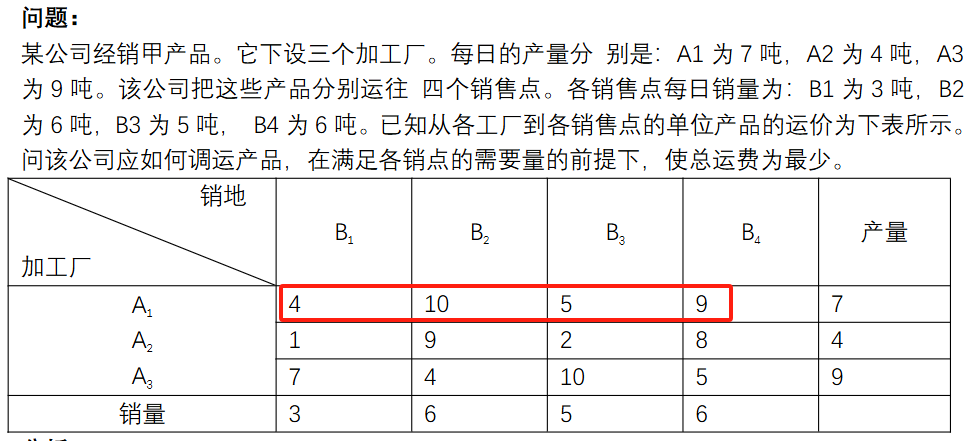

In [ ]:
"""
用 PuLP 求解 产品配送问题
作者： 姓名，时间
"""
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp

from pulp import *

######### 1、给相关节点命名，以节点名称为键， 相关参数为值创建字典 #########
# Creates a list of all the supply nodes
Factorys = ["A1", "A2", "A3"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A1": 7,
      "A2": 4,
      "A3": 9}

# Creates a list of all demand nodes
Point_of_sales = ["B1", "B2", "B3", "B4"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "B1": 3,
    "B2": 6,
    "B3": 5,
    "B4": 6,
}

######### 2、将成本数据输入到一个列表中 #########
# Creates a list of costs of each transportation path
costs = [  # 销售地 Point_of_sales
   # B1 B2 B3 B4
    [4, 10, 5, 9],  # A1   加工厂 Factorys  相比于上个例子，仅修改这里！！！
    [1, 9, 2, 8],  # A2
    [7, 4, 10, 5],  # A3
]

# The cost data is made into a dictionary
costs = makeDict([Factorys, Point_of_sales], costs, 0)
# costs[“A1”][“B1”]： 从加工厂 A1 到 销售地 B1 的成本


######### 3、LpProblem 函数创建 prob 变量 并求解 #########
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("产品配送问题", LpMinimize)

# 创建包含 所有可能的传输路径 的元组列表
# Creates a list of tuples containing all the possible routes for transport
Routes = [(f, p) for f in Factorys for p in Point_of_sales]

# 创建 包含 LP 变量， 名为 vars 的字典
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Factorys, Point_of_sales), 0, None, LpInteger) # 产品数量为整数

# 添加目标函数
# The objective function is added to 'prob' first
prob += (
    lpSum([vars[f][p] * costs[f][p] for (f, p) in Routes]),
    "运输成本",
)

# 添加约束
# The supply maximum constraints are added to prob for each supply node (warehouse)
for f in Factorys:
    prob += (
        lpSum([vars[f][p] for p in Point_of_sales]) <= supply[f],
        f"从加工厂 {f} 运出的产品数量",
    )

# The demand minimum constraints are added to prob for each demand node (bar)
for p in Point_of_sales:
    prob += (
        lpSum([vars[f][p] for f in Factorys]) >= demand[p],
        f"运到销售地 {p} 的产品数量",
    )

######### 4、求解并打印相关结果  #########

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("最低的运输成本 = ", value(prob.objective))

求解状态: Optimal
Route_A1_B1 = 0.0
Route_A1_B2 = 0.0
Route_A1_B3 = 4.0
Route_A1_B4 = 3.0
Route_A2_B1 = 3.0
Route_A2_B2 = 0.0
Route_A2_B3 = 1.0
Route_A2_B4 = 0.0
Route_A3_B1 = 0.0
Route_A3_B2 = 6.0
Route_A3_B3 = 0.0
Route_A3_B4 = 3.0
最低的运输成本 =  91.0


<font color=blue><font size=4>由于存在成本相同的路径，如 costs["A1"]["B1"] == costs["A3"]["B2"] == 4 等，这里的最优解与课件略有不同，但都是**运输成本最低**的合理方案。